# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 583


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    #time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cabo san lucas
Processing Record 2 of Set 1 | bilibino
Processing Record 3 of Set 1 | lompoc
Processing Record 4 of Set 1 | puerto natales
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | tucuma
Processing Record 7 of Set 1 | invercargill
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | edinburgh of the seven seas
Processing Record 10 of Set 1 | isafjordur
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | kargil
Processing Record 14 of Set 1 | kapa'a
Processing Record 15 of Set 1 | tiksi
Processing Record 16 of Set 1 | devinuwara
City not found. Skipping...
Processing Record 17 of Set 1 | waitangi
Processing Record 18 of Set 1 | kalmunai
Processing Record 19 of Set 1 | nar'yan-mar
Processing Record 20 of Set 1 | williamston
Processing Record 21 of Set 1 | coquimbo
Processing

In [ ]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [ ]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,28.15,95,62,2.35,AR,1723414493
1,whitehorse,60.7161,-135.0538,59.31,51,88,18.01,CA,1723414578
2,sabang,5.8933,95.3214,81.68,76,100,22.35,ID,1723414579
3,glendive,47.1053,-104.7125,65.82,77,0,3.44,US,1723414581
4,albany,42.6001,-73.9662,71.89,63,79,5.93,US,1723414507


In [ ]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [ ]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,28.15,95,62,2.35,AR,1723414493
1,whitehorse,60.7161,-135.0538,59.31,51,88,18.01,CA,1723414578
2,sabang,5.8933,95.3214,81.68,76,100,22.35,ID,1723414579
3,glendive,47.1053,-104.7125,65.82,77,0,3.44,US,1723414581
4,albany,42.6001,-73.9662,71.89,63,79,5.93,US,1723414507


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

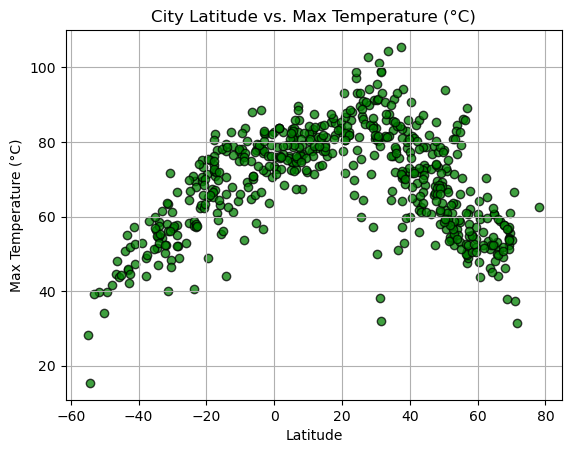

In [ ]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", linewidths=1, marker="o", alpha=0.75, color="green")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (°C)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)


# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

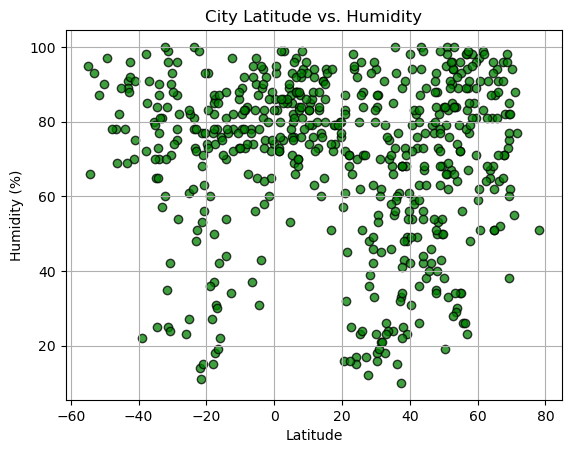

In [ ]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", linewidths=1, marker="o", alpha=0.75, color="green")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

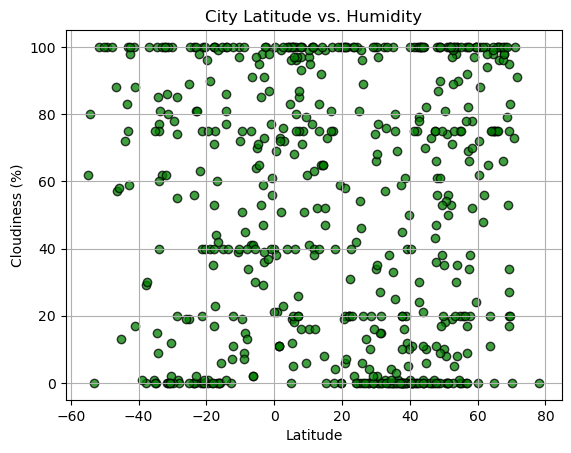

In [ ]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", linewidths=1, marker="o", alpha=0.75, color="green")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

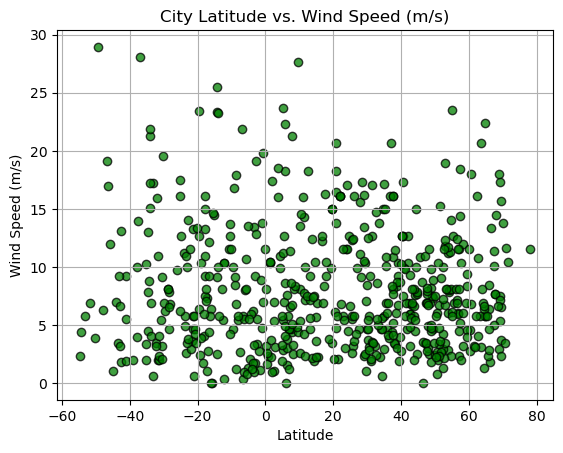

In [ ]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", linewidths=1, marker="o", alpha=0.75, color="green")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
linear_regress = lambda x, y, title, text_coordinates: plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    linear_regress(x_values, y_values, title, text_coordinates)
    plt.xlabel("Latitude")
    plt.ylabel(title)
    plt.title(title)
    plt.show()

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,whitehorse,60.7161,-135.0538,59.31,51,88,18.01,CA,1723414578
2,sabang,5.8933,95.3214,81.68,76,100,22.35,ID,1723414579
3,glendive,47.1053,-104.7125,65.82,77,0,3.44,US,1723414581
4,albany,42.6001,-73.9662,71.89,63,79,5.93,US,1723414507
5,borovskoy,53.8000,64.1500,56.73,74,100,6.06,KZ,1723414583


In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,28.15,95,62,2.35,AR,1723414493
6,margaret river,-33.9500,115.0667,58.44,70,77,21.30,AU,1723414584
7,hermanus,-34.4187,19.2345,54.54,73,85,8.77,ZA,1723414586
10,uturoa,-16.7333,-151.4333,77.74,78,60,12.17,PF,1723414589
11,edinburgh of the seven seas,-37.0676,-12.3116,58.77,91,100,28.05,SH,1723414590


###  Temperature vs. Latitude Linear Regression Plot

The r^squared is: 0.38942764997722684


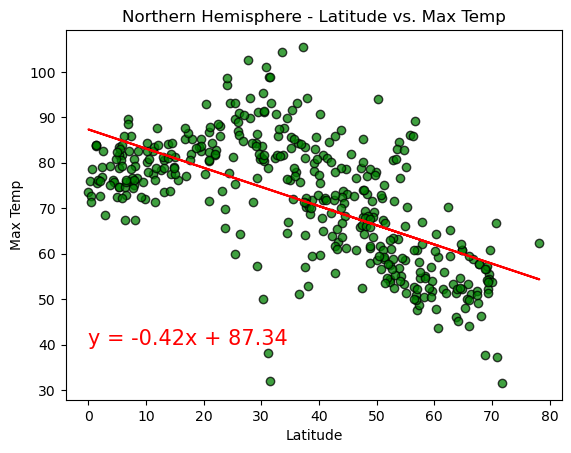

In [93]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
linear_equation = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values, edgecolors="black", linewidths=1, marker="o", alpha=0.75, color="green" )
plt.plot(x_values, regress_values, "r-")
plt.annotate(linear_equation, (0, 40), fontsize=15, color="red")
plt.title("Northern Hemisphere - Latitude vs. Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r^squared is: {rvalue**2}")
plt.show()

The r^squared is: 0.6666534710639377


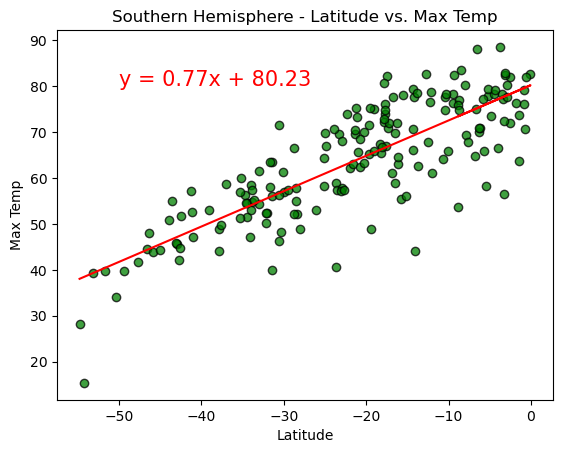

In [94]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
linear_equation = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values, edgecolors="black", linewidths=1, marker="o", alpha=0.75, color="green")
plt.plot(x_values, regress_values, "r-")
plt.annotate(linear_equation, (-50, 80), fontsize=15, color="red")
plt.title("Southern Hemisphere - Latitude vs. Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r^squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** 
Temperature increases near the equator and decreases as we move away. The r-squared value is close to 1, indicating the model explains most of the variance, suggesting a good fit.

### Humidity vs. Latitude Linear Regression Plot

The r^squared is: 0.006140607804764726


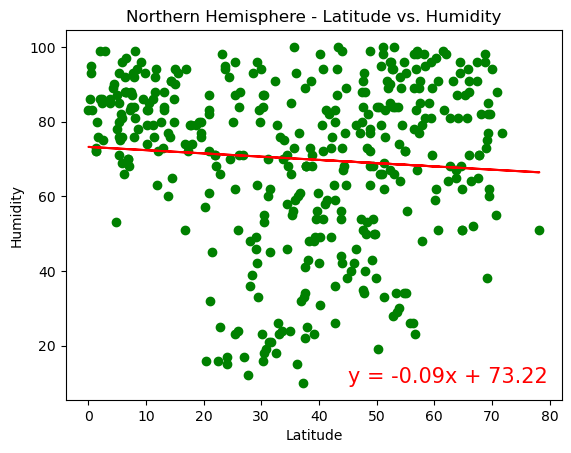

In [95]:
# Northern Hemisphere
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
linear_equation = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values, color = "green")
plt.plot(x_values, regress_values, "r-")
plt.annotate(linear_equation, (45, 10), fontsize=15, color="red")
plt.title("Northern Hemisphere - Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r^squared is: {rvalue**2}")
plt.show()

The r^squared is: 0.004949221144715298


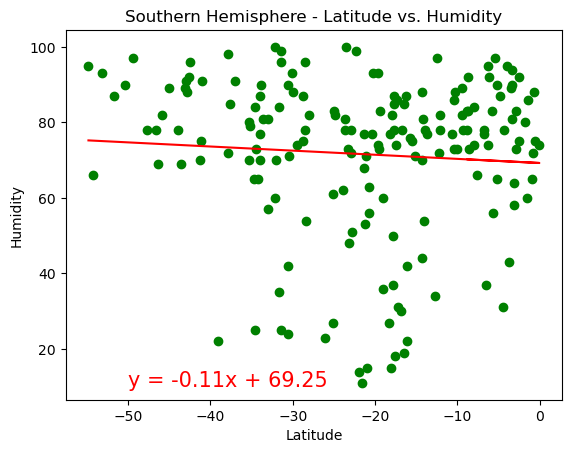

In [96]:
# Southern Hemisphere
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
linear_equation = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values, color = "green")
plt.plot(x_values, regress_values, "r-")
plt.annotate(linear_equation, (-50, 10), fontsize=15, color="red")
plt.title("Southern Hemisphere - Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r^squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** Humidity is lower near the equator in the Southern Hemisphere and higher in the Northern Hemisphere. The low r-squared value indicates the model poorly explains the variation in the data.

### Cloudiness vs. Latitude Linear Regression Plot

The r^squared is: 0.00022886955010926224


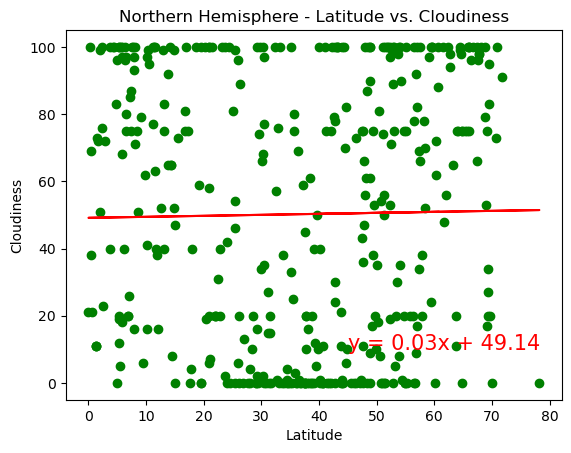

In [97]:
# Northern Hemisphere
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
linear_equation = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values, color = "green")
plt.plot(x_values, regress_values, "r-")
plt.annotate(linear_equation, (45, 10), fontsize=15, color="red")
plt.title("Northern Hemisphere - Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r^squared is: {rvalue**2}")
plt.show()

The r^squared is: 0.002148382112029391


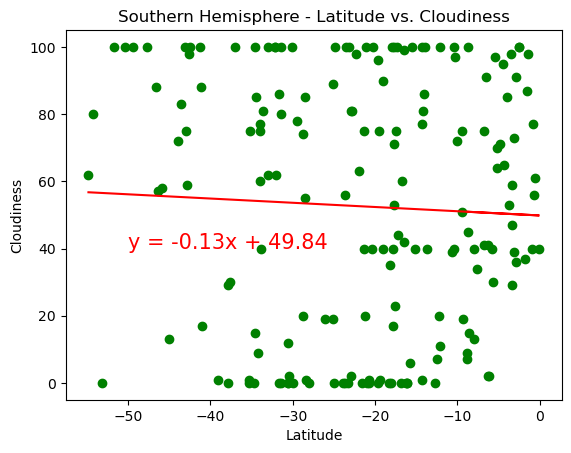

In [98]:
# Southern Hemisphere
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
linear_equation = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values, color = "green")
plt.plot(x_values, regress_values, "r-")
plt.annotate(linear_equation, (-50, 40), fontsize=15, color="red")
plt.title("Southern Hemisphere - Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r^squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** Cloudiness is higher near the equator and decreases as we move away in both hemispheres. The low r-squared values indicate that the model does not effectively explain the variation in the data.

### Wind Speed vs. Latitude Linear Regression Plot

The r^squared is: 0.00048715573854107527


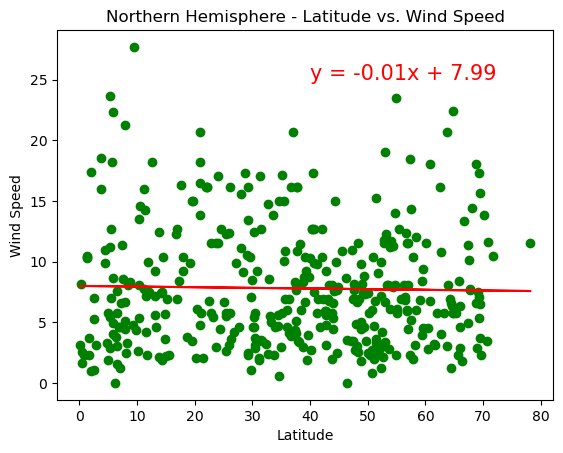

In [101]:
# Northern Hemisphere
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
linear_equation = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values, color = "green")
plt.plot(x_values, regress_values, "r-")
plt.annotate(linear_equation, (40, 25), fontsize=15, color="red")
plt.title("Northern Hemisphere - Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r^squared is: {rvalue**2}")
plt.show()

The r^squared is: 0.0020261014902977956


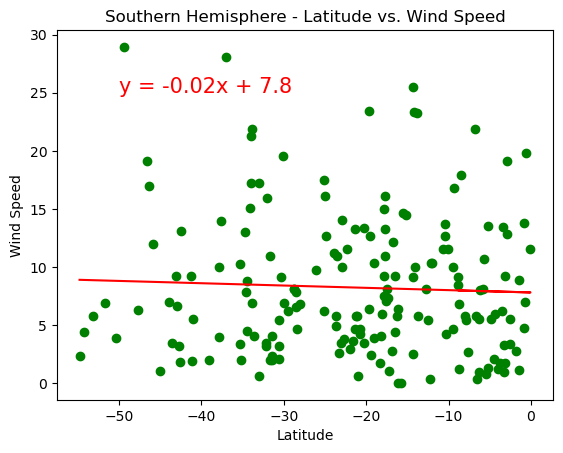

In [102]:
# Southern Hemisphere
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
linear_equation = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values, color = "green")
plt.plot(x_values, regress_values, "r-")
plt.annotate(linear_equation, (-50, 25), fontsize=15, color="red")
plt.title("Southern Hemisphere - Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r^squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** Wind speed is higher near the equator and decreases as we move away in the Northern Hemisphere, while it’s lower near the equator in the Southern Hemisphere. The low r-squared value suggests the model poorly explains the variation in the data.